Session #4 Homework

### Dataset
In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

### Preparation
- Create the target variable by mapping `yes` to 1 and `no` to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [53]:
%matplotlib inline

# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold

from IPython.display import display

In [2]:
df = pd.read_csv('AER_credit_card_data.csv')

In [3]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [5]:
df.card = (df.card == 'yes').astype(int)

In [6]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.card.values
y_val = df_val.card.values

del df_train['card']
del df_val['card']


In [8]:
len(df_train), len(df_val), len(df_test), len(df_train_full)

(791, 264, 264, 1055)

In [9]:
numerical = ['reports','age','income','share','expenditure','dependents','months','majorcards','active']
categorical = ['card','owner','selfemp']

In [22]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


### Training the model
From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

### Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [38]:
usecols = ["reports",
           "age", 
           "income", 
           "share", 
           "expenditure", 
           "dependents", 
           "months", 
           "majorcards", 
           "active", 
           "owner", 
           "selfemp"]

In [39]:
# Create dictionaries of the training data to apply one-hot enconding on categorical fatures 
train_dict = df_train[usecols].to_dict(orient='records')

In [40]:
dv = DictVectorizer(sparse=False)
# Create feature matrix with numerical and one-hot encoded categorical variables
X_train = dv.fit_transform(train_dict)

In [43]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [44]:
# Create feature matrix of validation partition 
val_dict = df_val[usecols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
y_pred = model.predict_proba(X_val)[:, 1]


In [46]:
auc_score = roc_auc_score(y_val, y_pred)
print(round(auc_score,3))

0.995


### Question 3
Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

In [47]:
scores = []

thresholds_test = np.linspace(0, 1, 101)

for t in thresholds_test:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [48]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [49]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

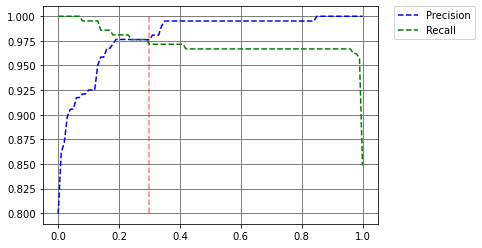

In [50]:
plt.plot(df_scores.threshold, df_scores['p'], "b--", label="Precision")
plt.plot(df_scores.threshold, df_scores['r'], "g--", label="Recall")
plt.vlines(0.3, 0.8, 1, color='r', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

In [51]:
thresholds = np.arange(0.0, 1.0, 0.01)
f1_score = []

for t in thresholds:
    y_predicts = (y_pred >= t).astype(int)

    predicted_positive = (y_predicts == 1)
    predicted_negative = (y_predicts == 0)

    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()

    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    score = (2 * precision * recall) / (precision + recall)
    f1_score.append(score)

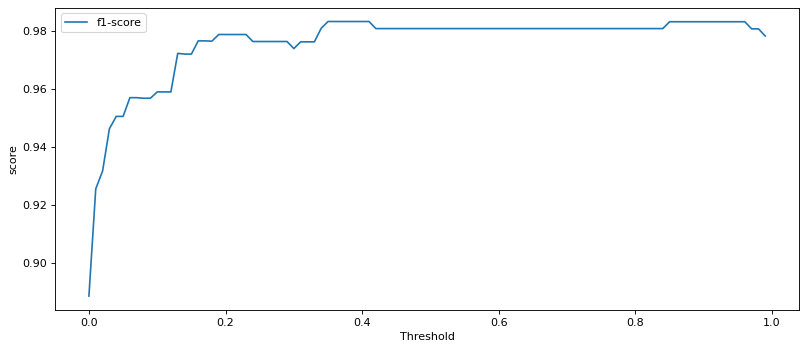

In [52]:
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(thresholds, f1_score, label='f1-score')

plt.xlabel("Threshold")
plt.ylabel("score")

plt.legend()
plt.show()

### Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?


In [62]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[usecols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000, random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

In [63]:
def predict(df, dv, model):
    dicts = df[usecols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    # y_pred = model.predict(X)
    return y_pred

In [64]:
n_splits = 5
C=1.0
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)


    auc_score = roc_auc_score(y_val, y_pred)
    scores.append(auc_score)
print('C=%s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0, 0.996 +- 0.003


### Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?


In [66]:
def predict(df, dv, model):
    dicts = df[usecols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    #y_pred = model.predict(X)
    return y_pred

In [68]:
from tqdm.auto import tqdm

In [70]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        scores.append(auc_score)
    print('C=%s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01, 0.992 +- 0.006
C=0.1, 0.995 +- 0.004
C=1, 0.996 +- 0.003
C=10, 0.996 +- 0.003
